In [1]:
import nltk
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('..')
from utils.visualization import plot_top_counter, plot_top_pos_instances
from utils.another import get_ngrams_and_tags
from collections import Counter

C:\Users\persi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


### load test corpus, ngram counters

In [3]:
test_corpus = []
with open('../data/test_v2-preprocessed.txt','rt') as file:
    for line in file:
        test_corpus.append(line.rstrip().split(' '))

# Pos-tag ngrams

In [3]:
tagged_sentences = []
for sentence in test_corpus:
    tagged_sentences.append(nltk.pos_tag(sentence))

# UNIGRAMS

In [4]:
tagged_unigrams_counter = Counter()
for sentence in tagged_sentences:
    tagged_unigrams_counter.update(sentence)
    
unigram_tags_counter = Counter()
for uni_tag, count in tagged_unigrams_counter.items():
    _, tag = uni_tag
    unigram_tags_counter.update({tag : count})

### the most common POS

number of all unique UNIGRAM-TAG pair in test corpus: 227286
number of all unique unigram's tags in test corpus: 44


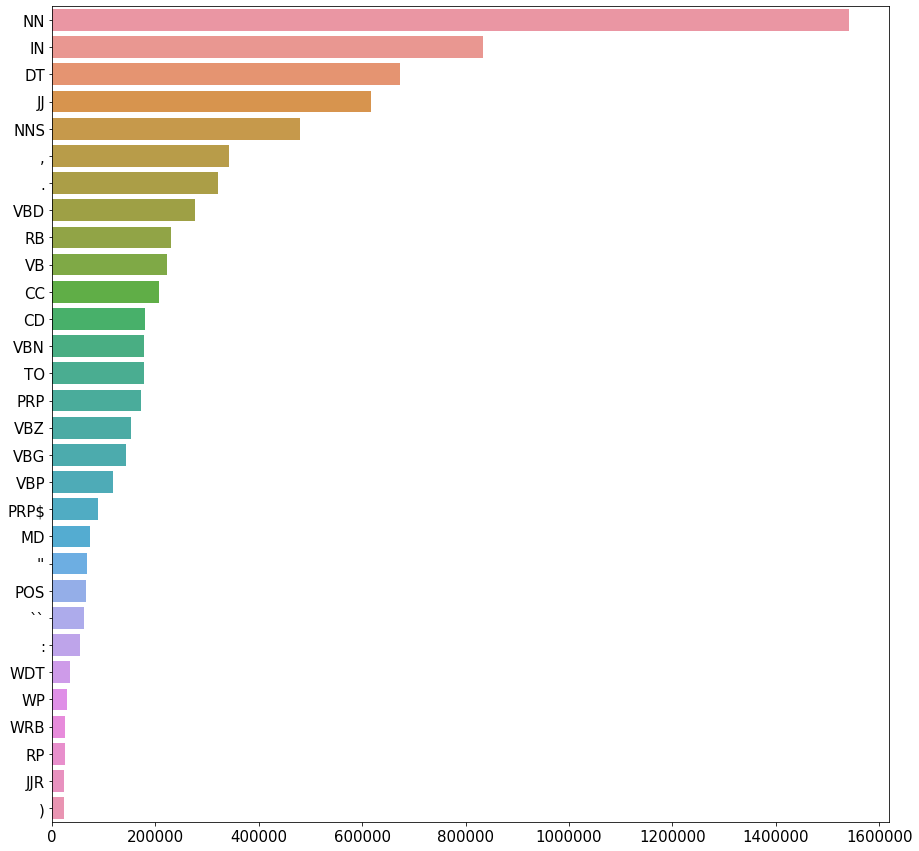

In [5]:
print(f"number of all unique UNIGRAM-TAG pair in test corpus: {len(tagged_unigrams_counter)}")
print(f"number of all unique unigram's tags in test corpus: {len(unigram_tags_counter)}")
plot_top_counter(unigram_tags_counter)

### the most common instances of individual POS

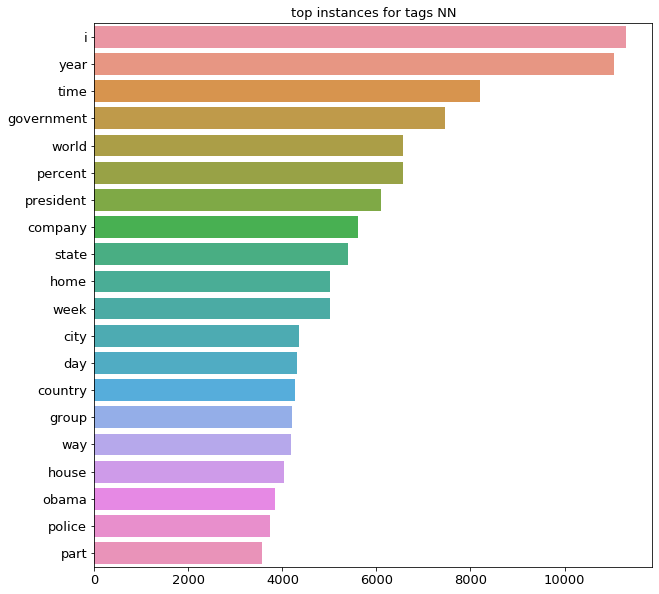

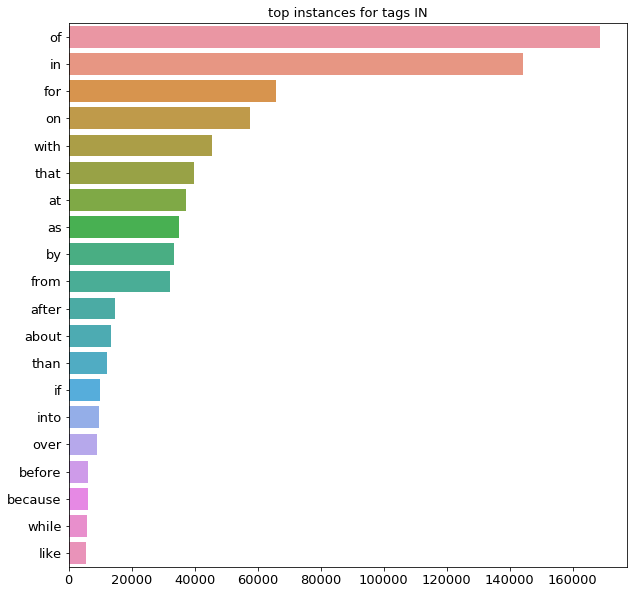

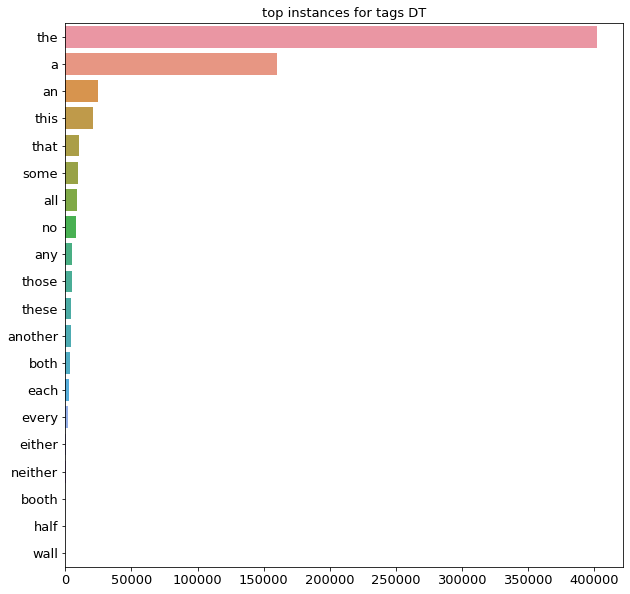

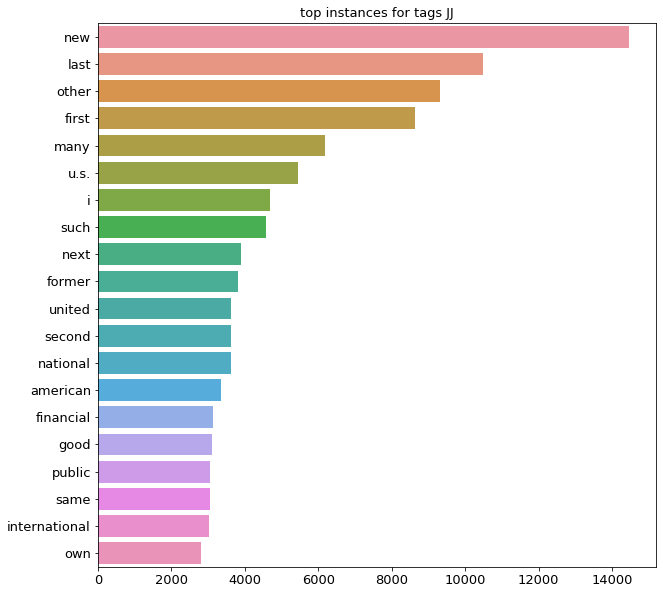

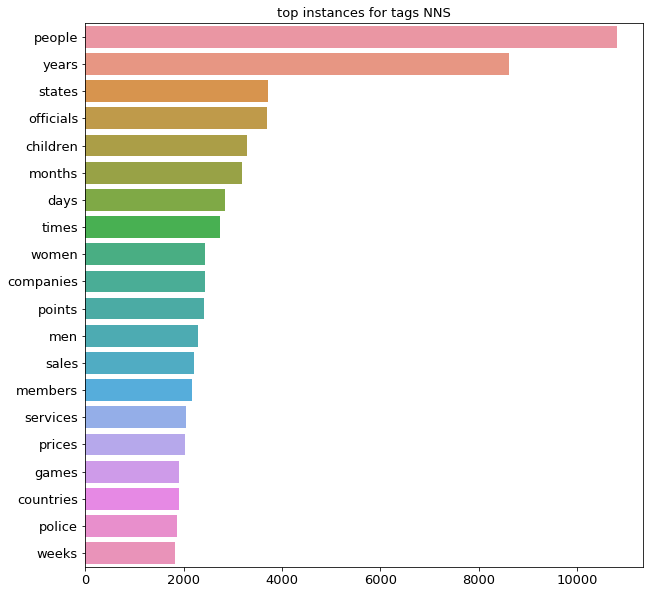

In [6]:
for tag, _ in unigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_unigrams_counter, tag, 20)

# BIGRAMS

In [4]:
tagged_bigrams_counter = Counter()
for i, sentence in enumerate(test_corpus):
    print(f'working on {i} line', end='\r')
    tagged_bigrams_counter.update(get_ngrams_and_tags(sentence,2))

In [5]:
bigram_tags_counter = Counter()
for tagged_bigram, count in tagged_bigrams_counter.items():
    _, tags = tagged_bigram
    bigram_tags_counter.update({tags : count})

### the most common pairs of POS

number of all unique BIGRAM-TAG pair in test corpus: 1881410
number of all unique bigram's tags in test corpus: 1263


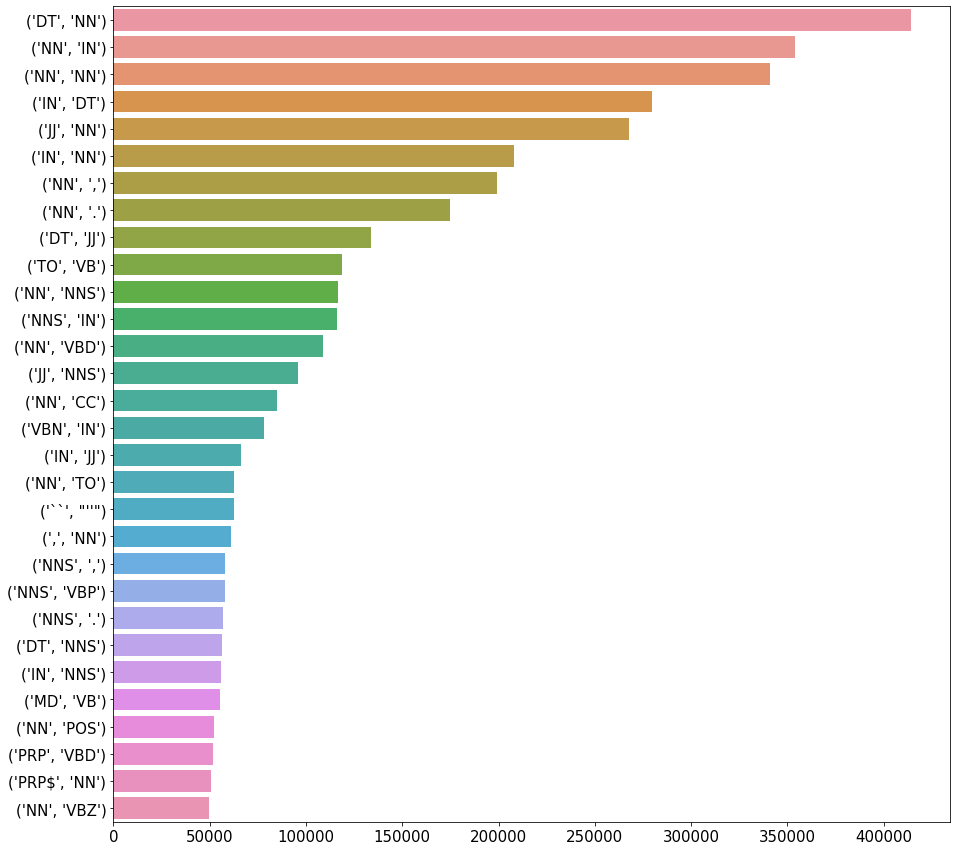

In [6]:
print(f"number of all unique BIGRAM-TAG pair in test corpus: {len(tagged_bigrams_counter)}")
print(f"number of all unique bigram's tags in test corpus: {len(bigram_tags_counter)}")
plot_top_counter(bigram_tags_counter)

### the most common instances of some pairs of POS

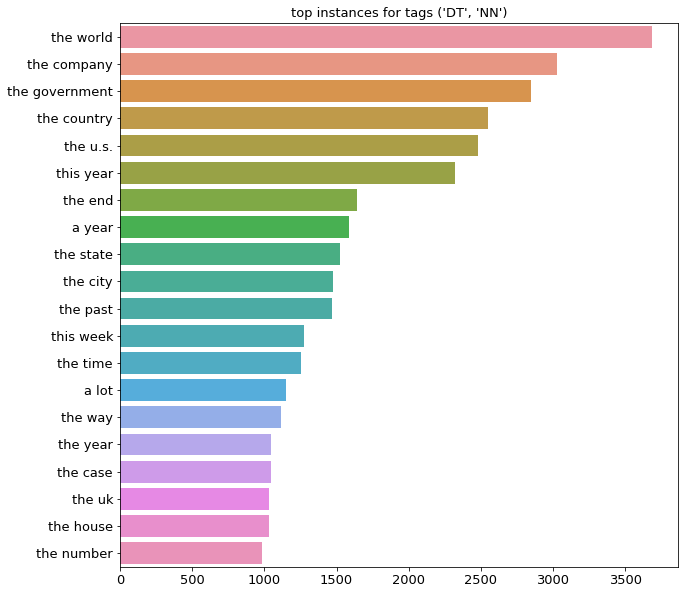

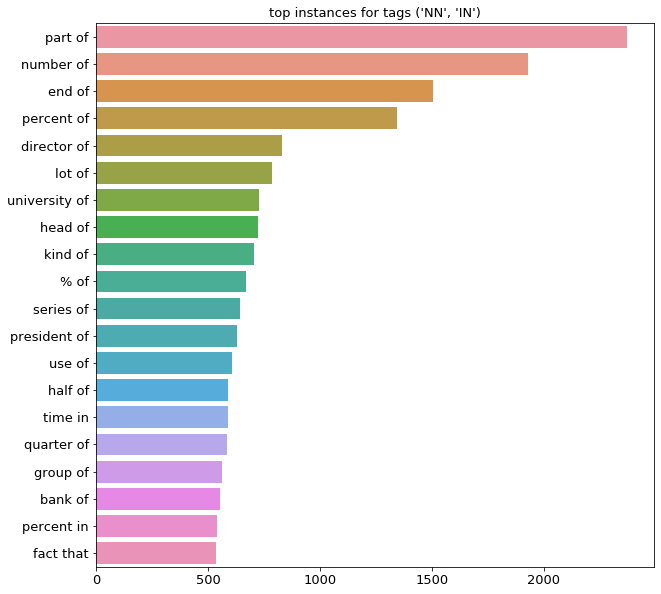

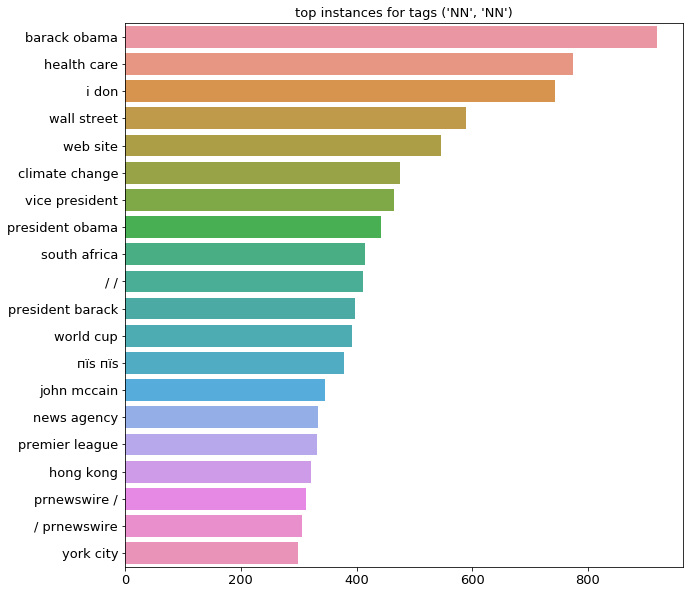

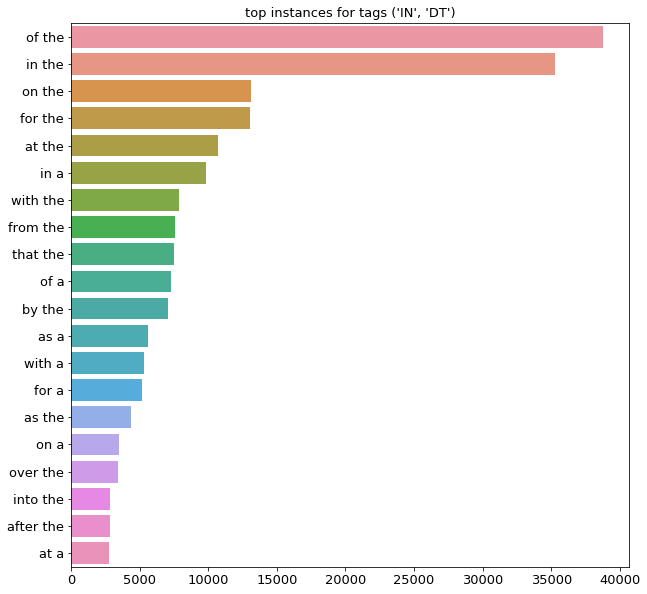

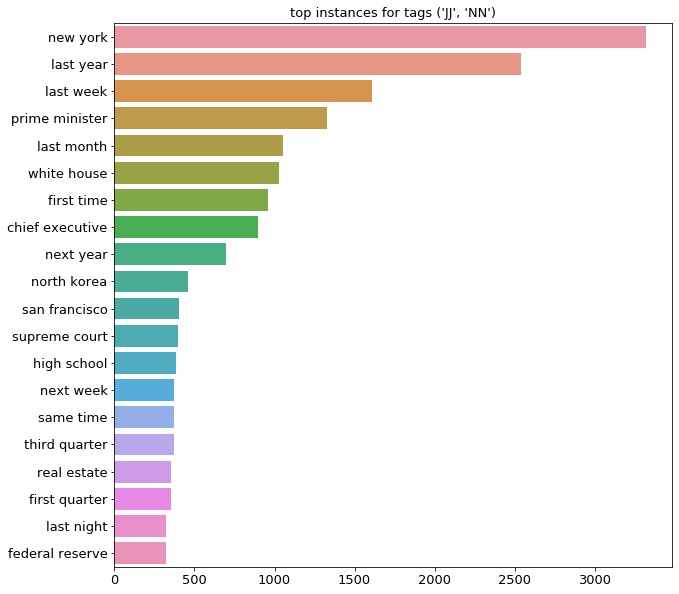

In [7]:
for tags, _ in bigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_bigrams_counter, tags, 20)

# TRIGRAMS

In [9]:
tagged_trigrams_counter = Counter()
for i, sentence in enumerate(test_corpus):
    print(f'working on {i} line', end='\r')
    tagged_trigrams_counter.update(get_ngrams_and_tags(sentence,3))

In [10]:
trigram_tags_counter = Counter()
for tagged_trigram, count in tagged_trigrams_counter.items():
    _, tags = tagged_trigram
    trigram_tags_counter.update({tags:count})

### the most common triples of POS

number of all unique TRIGRAM-TAG pair in test corpus: 4594232
number of all unique trigram's tags in test corpus: 23468


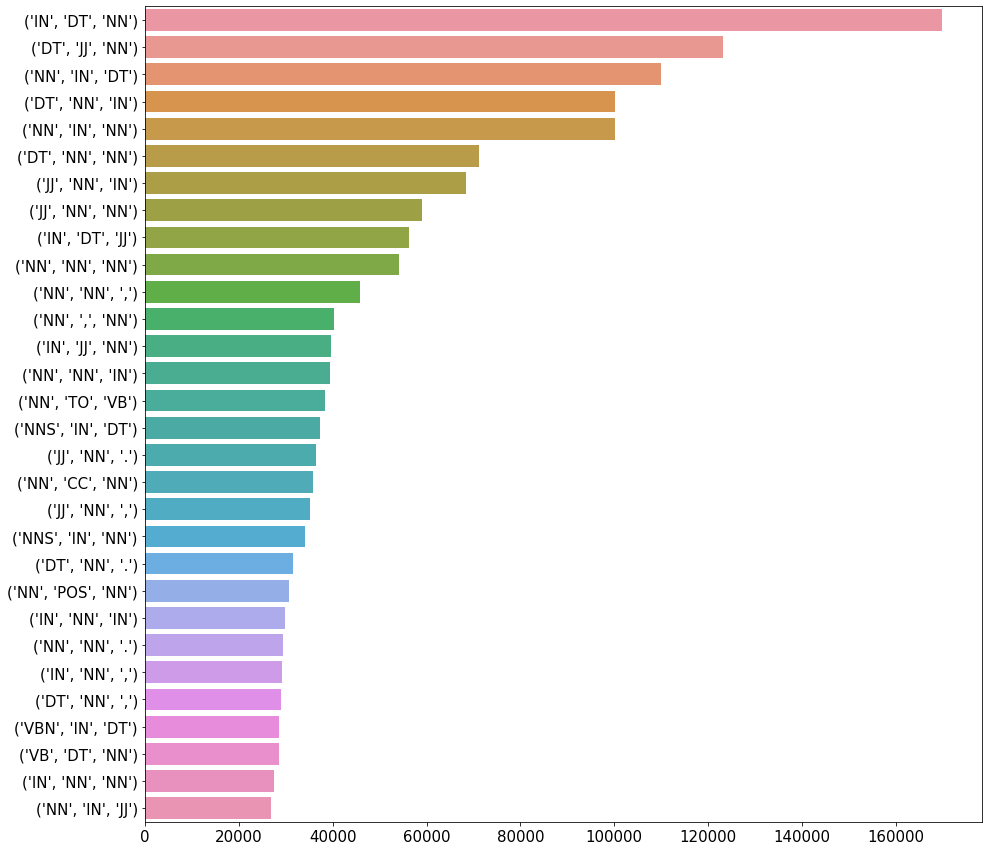

In [12]:
print(f"number of all unique TRIGRAM-TAG pair in test corpus: {len(tagged_trigrams_counter)}")
print(f"number of all unique trigram's tags in test corpus: {len(trigram_tags_counter)}")
plot_top_counter(trigram_tags_counter)

### the most common instances of some triples of POS

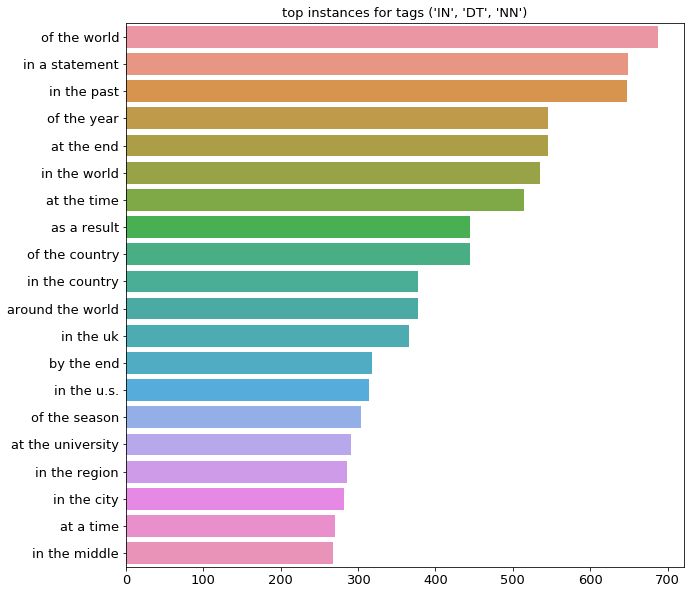

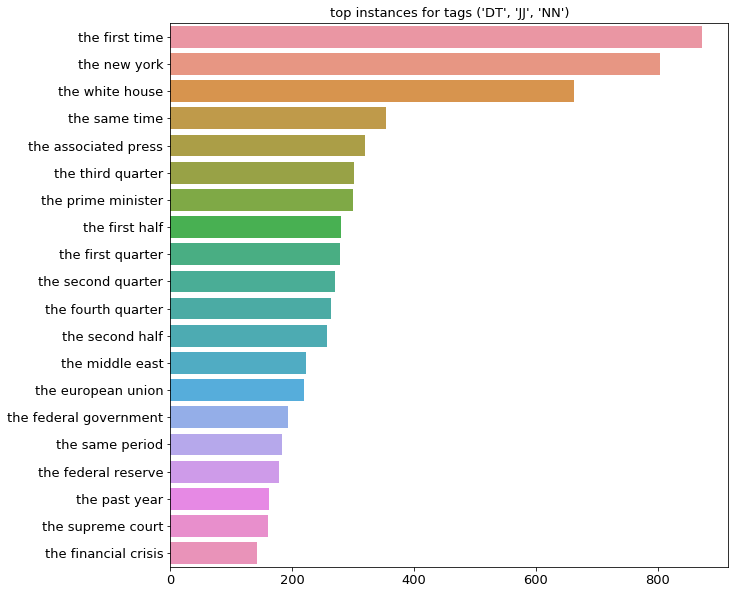

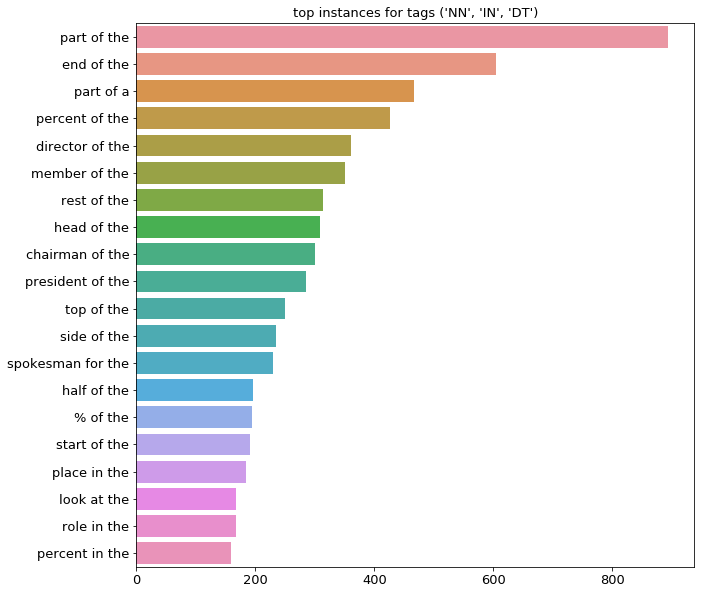

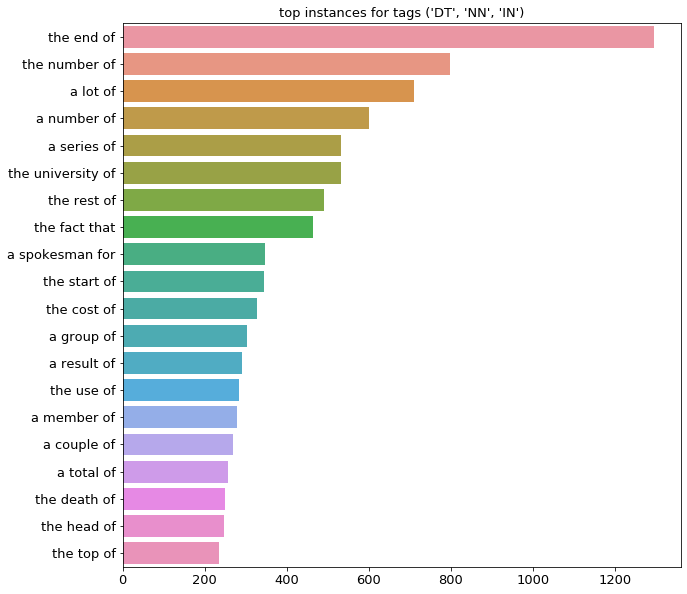

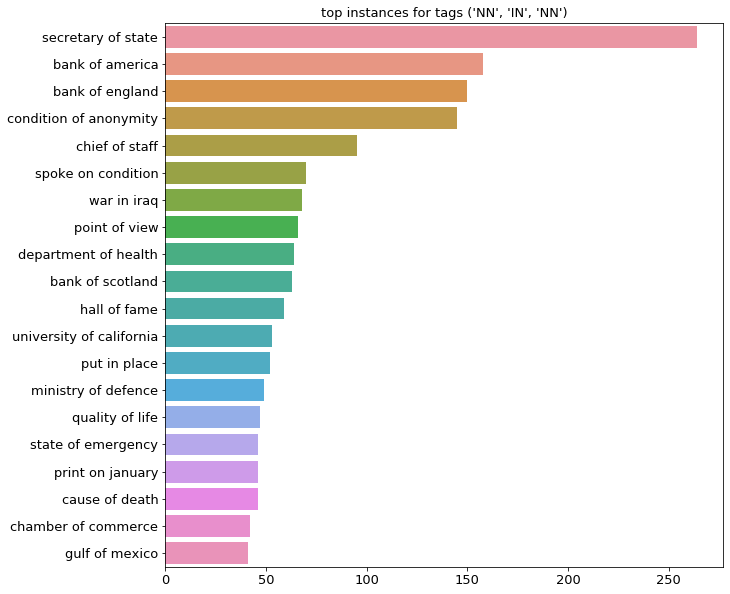

In [11]:
for tags, _ in trigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_trigrams_counter, tags, 20)

In [47]:
with open('../data/tagged_unigrams_counter_test_str.pickle', 'wb') as unigram_file, \
        open('../data/tagged_bigrams_counter_test_str.pickle', 'wb') as bigram_file, \
        open('../data/tagged_trigrams_counter_test_str.pickle', 'wb') as trigram_file:
    pickle.dump(tagged_unigrams_counter, unigram_file)
    pickle.dump(tagged_bigrams_counter, bigram_file)
    pickle.dump(tagged_trigrams_counter, trigram_file)    